In [ ]:
## Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visual do graficos
plt.style.use('seaborn-v0_8')

In [ ]:
## Dataset
df = pd.read_csv('vendas.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2021-103800,03-01-2021,07-01-2021,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,US-2021-112326,04-01-2021,08-01-2021,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,3,US-2021-112326,04-01-2021,08-01-2021,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,4,US-2021-112326,04-01-2021,08-01-2021,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,5,US-2021-141817,05-01-2021,12-01-2021,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [ ]:
## Limpeza de Dados

df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

# Criar coluna Ano-Mês
df['YearMonth'] = df['Order Date'].dt.to_period('M').astype(str)

# Dados ausentes e duplicados
print("Valores ausentes:\n", df.isnull().sum())
print("\nDuplicatas:", df.duplicated().sum())


Valores ausentes:
 Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country/Region    0
City              0
State/Province    0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
YearMonth         0
dtype: int64

Duplicatas: 0


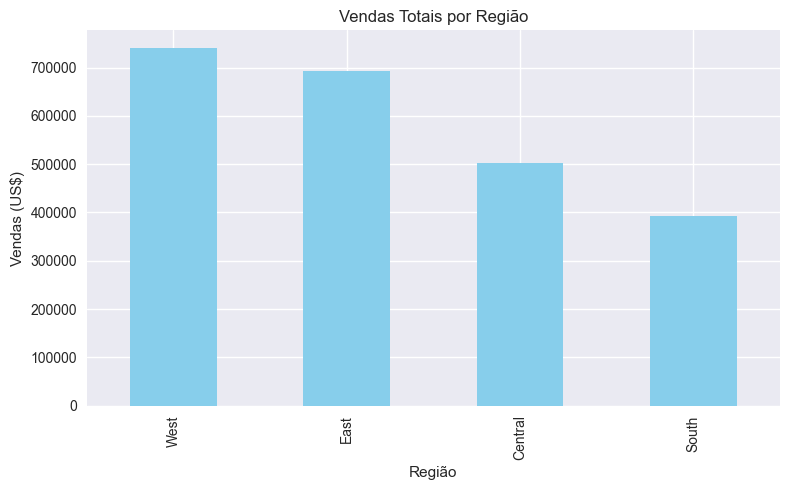

In [ ]:
## Vendas por Região

sales_by_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sales_by_region.plot(kind='bar', color='skyblue')
plt.title('Vendas Totais por Região')
plt.xlabel('Região')
plt.ylabel('Vendas (US$)')
plt.tight_layout()
plt.show()


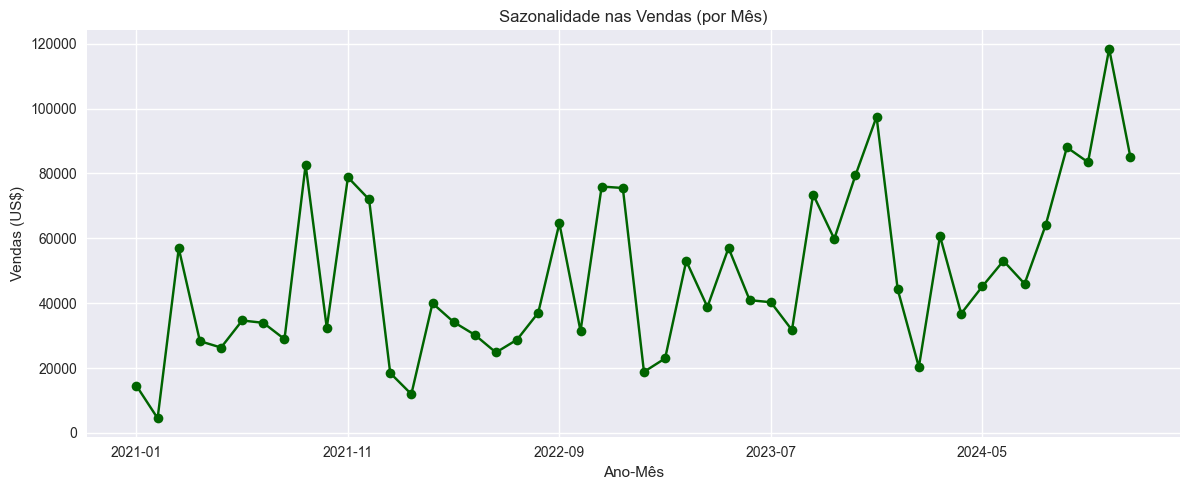

In [ ]:
## Sazonalidade - Vendas por Mês

monthly_sales = df.groupby('YearMonth')['Sales'].sum()

plt.figure(figsize=(12, 5))
monthly_sales.plot(marker='o', color='darkgreen')
plt.title('Sazonalidade nas Vendas (por Mês)')
plt.xlabel('Ano-Mês')
plt.ylabel('Vendas (US$)')
plt.tight_layout()
plt.show()


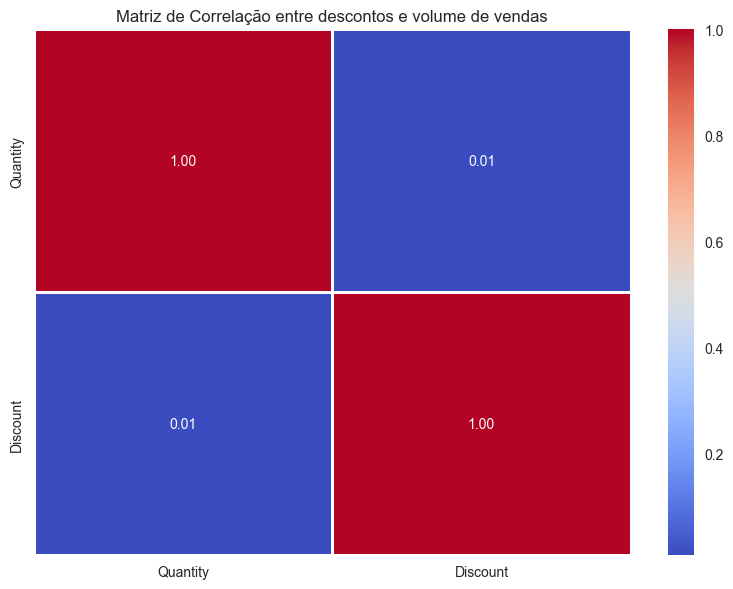

In [ ]:
## Correlação entre Desconto e Quantidade Vendida

# Colunas usadas
numeric_cols = df[['Quantity', 'Discount']]

# Gera matriz de correlação
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title('Matriz de Correlação entre descontos e volume de vendas')
plt.tight_layout()
plt.show()
